In [39]:
from visual_behavior.data_access import loading
import matplotlib.pyplot as plt
import visual_behavior.database as db

from visual_behavior import utilities
import visual_behavior.plotting as vbp
import numpy as np

import figrid as fg

import seaborn as sns

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [19]:
%matplotlib notebook

In [3]:
et = loading.get_filtered_ophys_experiment_table()

In [29]:
et.sample()

,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,donor_id,sex,age_in_days,full_genotype,mouse_id,reporter_line,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,model_outputs_available,location,session_number
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1010557562,1010462508,1010487593,1018027971,VisualBehaviorMultiscope4areasx2d,container_qc,passed,20200226_489065_session4,OPHYS_4_images_H,MESO.1,2020-02-26 13:59:01.613631,972289328,958769031,958769021,F,206.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489065,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Vip-IRES-Cre'],270,VISl,NaN,958769031,Vip-IRES-Cre,NaN,percent_change_intensity,0,0.0,3.0,False,Vip_VISl_270,4


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [30]:
oeid = 1010557562
session = loading.get_ophys_dataset(oeid)

osid = db.lims_query('select ophys_session_id from ophys_experiments where id = {}'.format(oeid))
eye_data = utilities.EyeTrackingData(osid)

/home/dougo/anaconda3/envs/vba/lib/python3.7/site-packages/numpy/lib/type_check.py:159: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  return val.real
/home/dougo/.local/lib/python3.7/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [31]:
np.sort(session.eye_tracking.columns)

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


array(['cr_area', 'cr_area_raw', 'cr_center_x', 'cr_center_y',
       'cr_height', 'cr_phi', 'cr_width', 'eye_area', 'eye_area_raw',
       'eye_center_x', 'eye_center_y', 'eye_height', 'eye_phi',
       'eye_width', 'likely_blink', 'pupil_area', 'pupil_area_raw',
       'pupil_center_x', 'pupil_center_y', 'pupil_height', 'pupil_phi',
       'pupil_width', 'timestamps'], dtype=object)

In [32]:
session.eye_tracking

,timestamps,cr_area,eye_area,pupil_area,likely_blink,pupil_area_raw,cr_area_raw,eye_area_raw,cr_center_x,cr_center_y,cr_width,cr_height,cr_phi,eye_center_x,eye_center_y,eye_width,eye_height,eye_phi,pupil_center_x,pupil_center_y,pupil_width,pupil_height,pupil_phi
frame,,,,,,,,,,,,,,,,,,,,,,,
0,0.11421,NaN,NaN,NaN,True,19416.418996,216.992125,57708.597819,340.332906,252.315486,9.067484,7.617410,-0.552291,345.003765,236.366356,148.646817,123.576257,-0.117911,359.451964,230.193961,72.244751,78.615763,-0.607889
1,0.12746,NaN,NaN,NaN,True,21332.372860,177.354188,57652.605768,340.038467,252.528357,7.885802,7.158890,-0.497289,345.696679,236.858141,148.966650,123.191294,-0.111767,360.086625,227.665799,74.155351,82.403308,-0.211089
2,0.14538,NaN,NaN,NaN,True,NaN,195.257092,56838.312404,337.513075,253.450336,8.751598,7.101819,-0.445420,344.786935,237.801166,146.527092,123.473390,-0.159513,NaN,NaN,NaN,NaN,NaN
3,0.17971,NaN,NaN,NaN,True,NaN,132.084741,56704.714226,335.414457,254.821737,7.788107,5.398472,-0.153407,342.673351,238.806385,147.285991,122.548458,-0.142143,NaN,NaN,NaN,NaN,NaN
4,0.21944,NaN,NaN,NaN,True,NaN,110.564780,57422.194529,335.518706,254.460654,6.692331,5.258835,-0.206350,342.269113,236.962609,148.019201,123.484332,-0.139551,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136269,4542.43935,NaN,NaN,NaN,True,NaN,237.372980,42948.860871,336.377915,253.409862,8.397035,8.998196,0.445003,347.086634,230.698263,138.094954,98.997440,0.032487,NaN,NaN,NaN,NaN,NaN
136270,4542.46316,NaN,NaN,NaN,True,20005.154421,223.077634,43072.919057,336.859867,253.243242,8.181963,8.678579,0.582486,347.111292,230.516419,137.963828,99.377758,0.028992,378.723397,214.573586,79.798737,49.597865,0.288166
136271,4542.49991,NaN,NaN,NaN,True,NaN,189.536407,43496.403329,337.018417,254.517852,8.018600,7.523921,-0.418045,345.651441,231.971018,138.476930,99.982974,0.011379,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


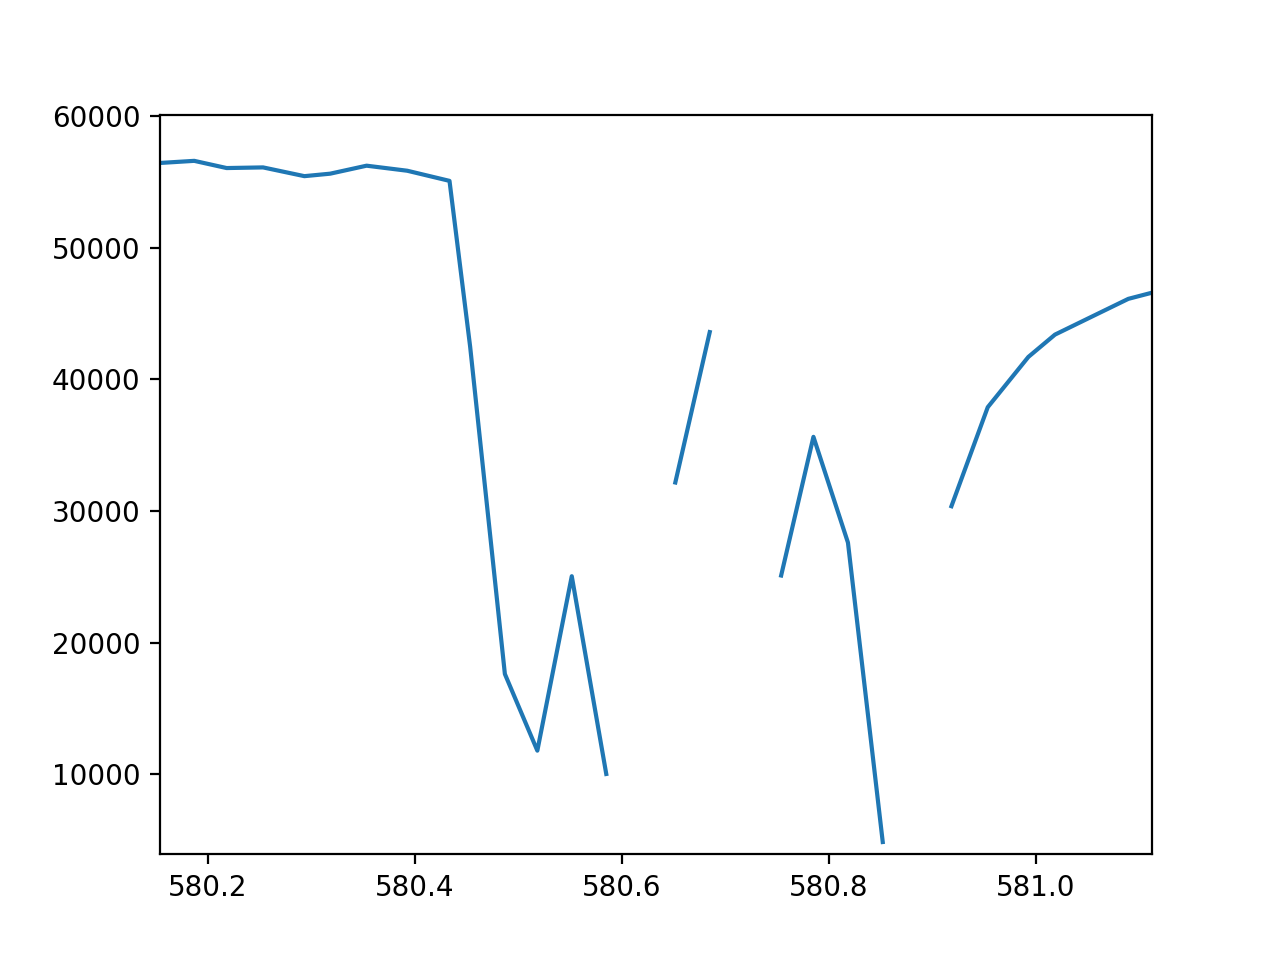

In [33]:
fig, ax = plt.subplots()
ax.plot(
    session.eye_tracking['timestamps'],
    session.eye_tracking['eye_area_raw']
)

In [54]:
0.5*sdk_eye_data['pupil_area'].max() + 0.5*sdk_eye_data['pupil_area'].min()

7461.250209395855

<IPython.core.display.Javascript object>


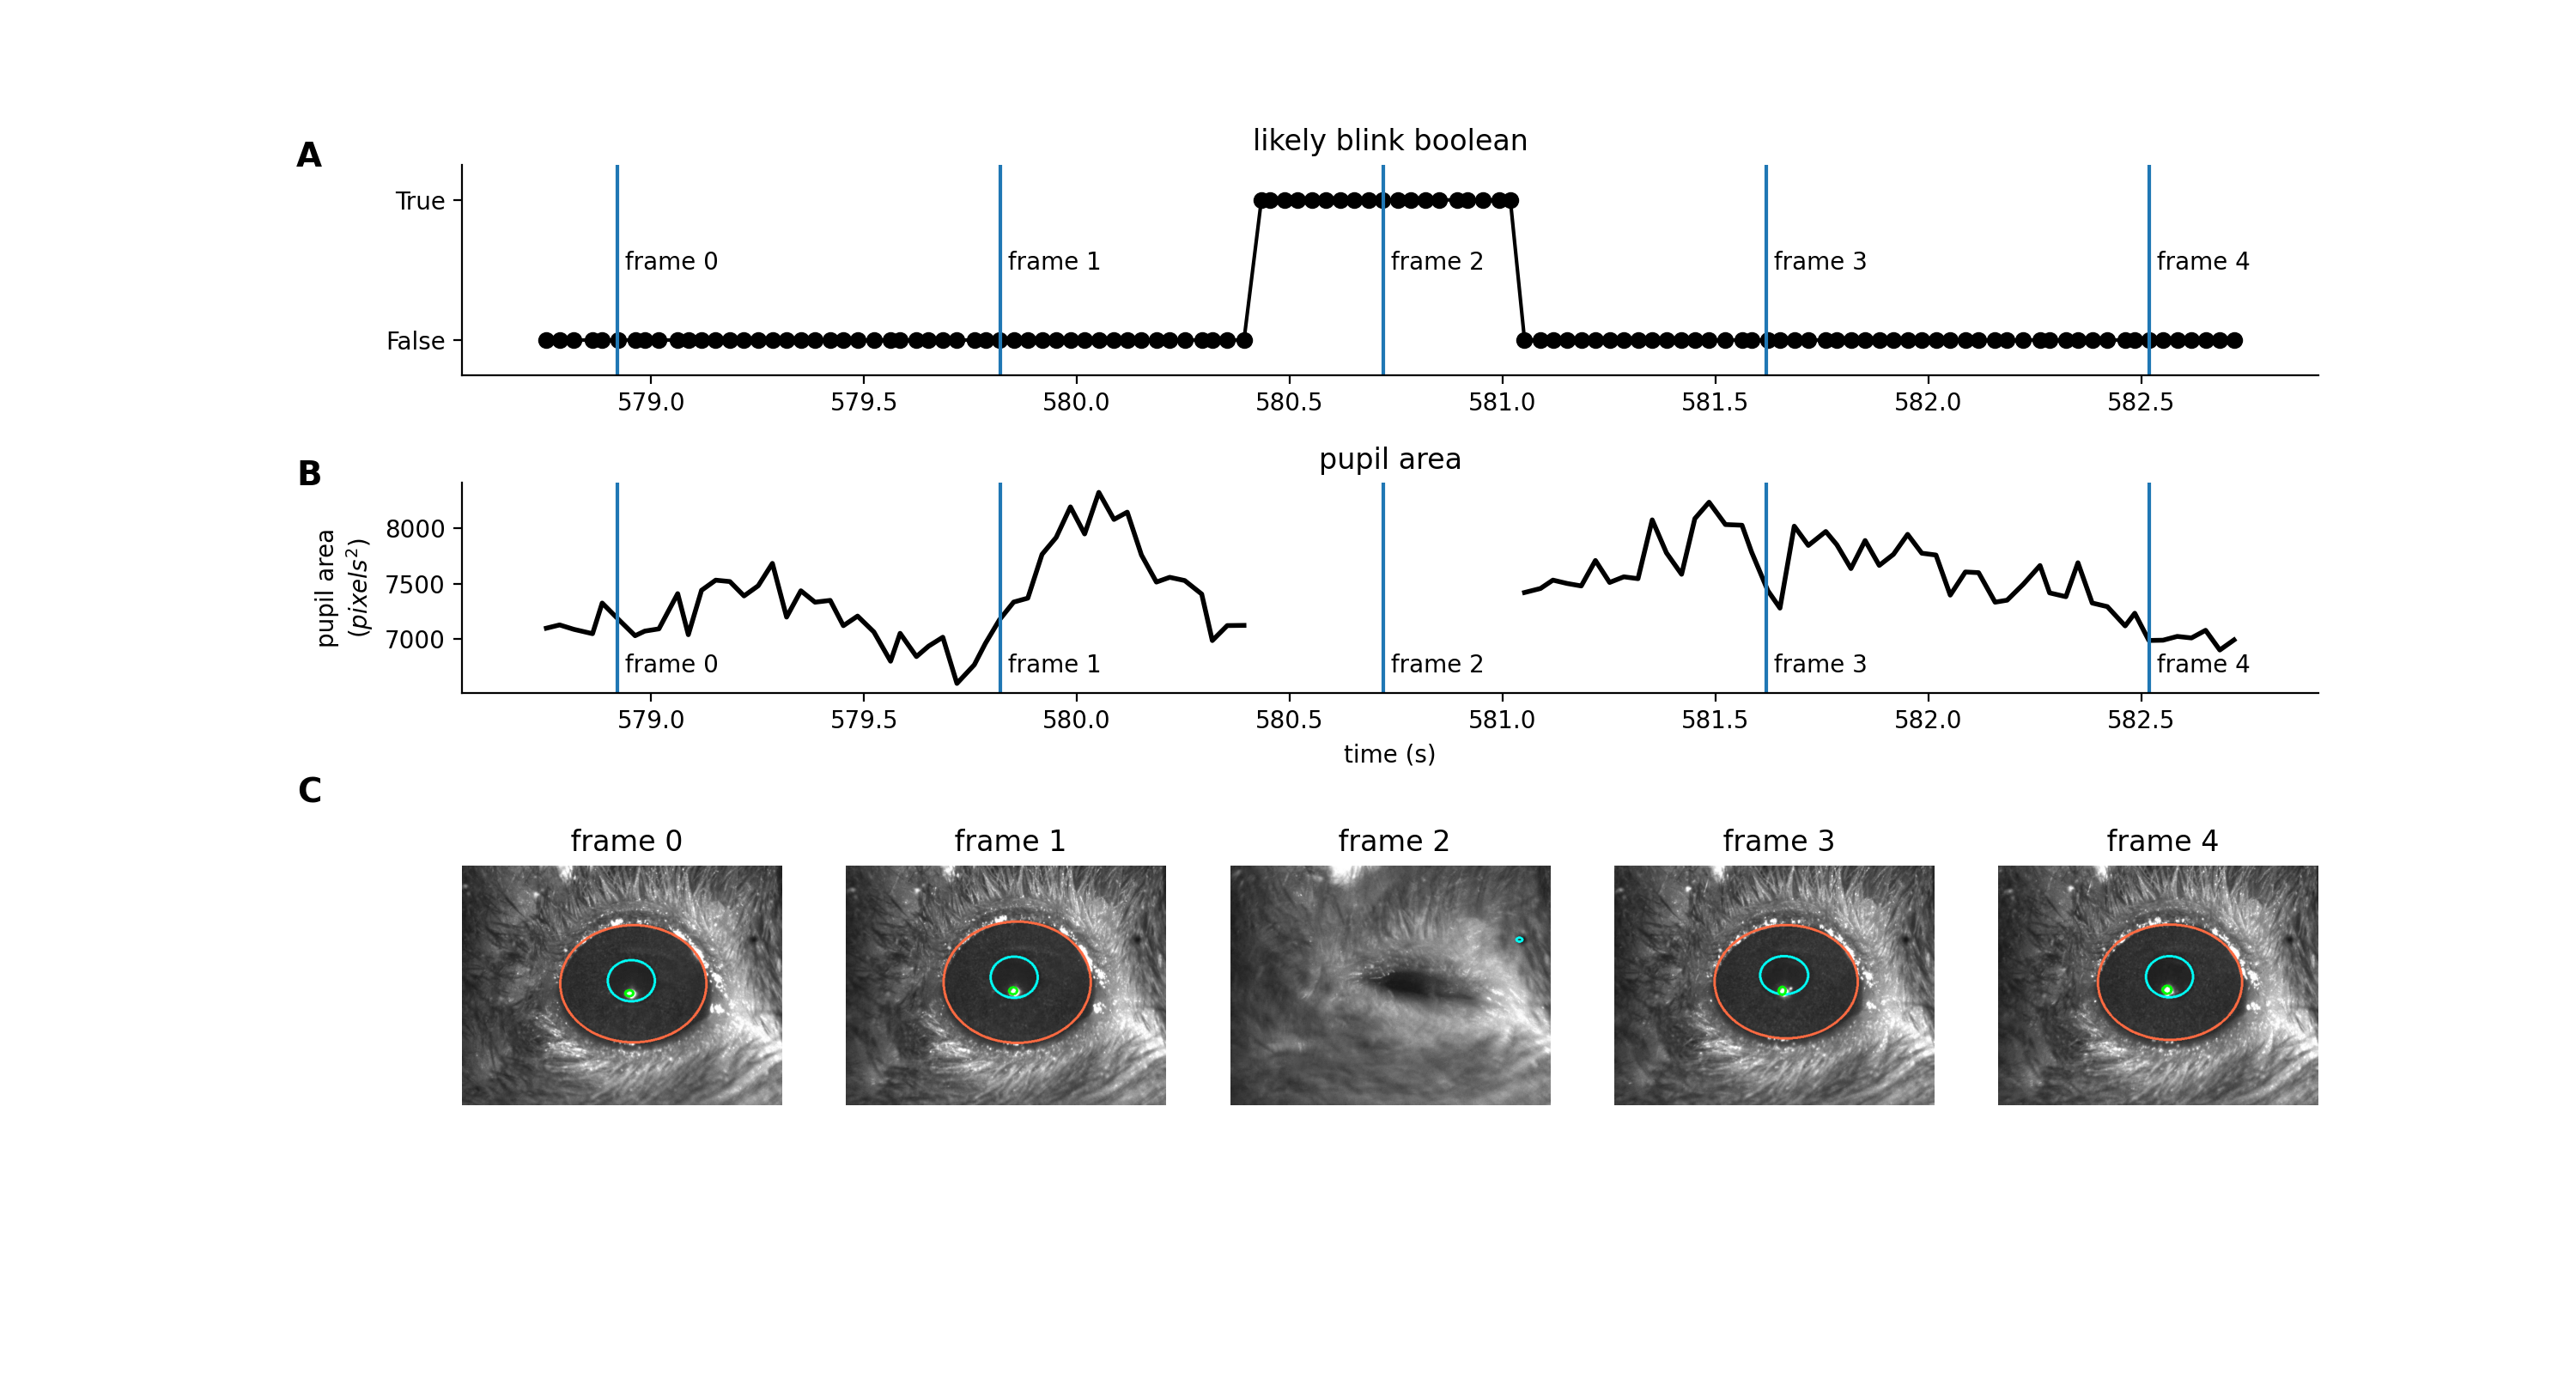

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/utilities.py:534: FutureWarning: `item` has been deprecated and will be removed in a future version
  if pd.notnull(ellipse_fit_row['center_x'].item()):
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/utilities.py:536: FutureWarning: `item` has been deprecated and will be removed in a future version
  int(ellipse_fit_row['center_x'].item()),
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/utilities.py:537: FutureWarning: `item` has been deprecated and will be removed in a future version
  int(ellipse_fit_row['center_y'].item())
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/utilities.py:541: FutureWarning: `item` has been deprecated and will be removed in a future version
  int(ellipse_fit_row['width'].item()),
/allen/programs/braintv/workgroups/nc-ophy

In [75]:
t0 = 580.72
t_span = 2

pupil_sample_times = [
    t0 - 1.8,
    t0 - 0.9,
    t0,
    t0 + 0.9,
    t0 + 1.8
]

fig = plt.figure(figsize=(15,8))
ax = {}
ax['likely_blinks'] = fg.place_axes_on_grid(fig, xspan = [0.075,1], yspan = [0, 0.2])
ax['pupil_area'] = fg.place_axes_on_grid(fig, xspan = [0.075,1], yspan = [0.3,0.5], sharex=ax['likely_blinks'])
ax['pupil_samples'] = fg.place_axes_on_grid(fig, dim = [1,len(pupil_sample_times)], xspan = [0.075,1], yspan = [0.55, 1])

labels = [
    {'label_text':'A', 'xpos':0,    'ypos':0.0, 'fontsize':14, 'weight': 'bold', 'ha': 'right', 'va': 'bottom'},
    {'label_text':'B', 'xpos':0,    'ypos':0.3, 'fontsize':14, 'weight': 'bold', 'ha': 'right', 'va': 'bottom'},
    {'label_text':'C', 'xpos':0,    'ypos':0.6, 'fontsize':14, 'weight': 'bold', 'ha': 'right', 'va': 'bottom'},
]


sdk_eye_data = session.eye_tracking.query('timestamps >= @t0-@t_span and timestamps <= @t0+@t_span')


ax['likely_blinks'].plot(
    sdk_eye_data['timestamps'],
    sdk_eye_data['likely_blink'],
    color='black',
    marker = 'o'
)


ax['likely_blinks'].set_title('likely blink boolean')


ax['pupil_area'].plot(
    sdk_eye_data['timestamps'],
    sdk_eye_data['pupil_area'],
    color='black',
    linewidth=2
)


ax['pupil_area'].set_title('pupil area')
ax['pupil_area'].set_xlabel('time (s)')

for ii,pupil_sample_time in enumerate(pupil_sample_times):
    text = ' frame {}'.format(ii)
    ax['likely_blinks'].axvline(pupil_sample_time)
    ax['likely_blinks'].text(pupil_sample_time, 0.5, text)
    
    ax['pupil_area'].axvline(pupil_sample_time)
    ax['pupil_area'].text(pupil_sample_time, sdk_eye_data['pupil_area'].min() + 100, text)
    
    ax['pupil_samples'][ii].imshow(eye_data.get_annotated_frame(time=pupil_sample_time, pupil=True, eye=True, corneal_reflection=True))
    ax['pupil_samples'][ii].set_title(text)
    ax['pupil_samples'][ii].axis('off')
    
ax['likely_blinks'].set_yticks([0,1])
ax['likely_blinks'].set_yticklabels(['False','True'])
ax['likely_blinks'].set_ylim([-0.25, 1.25])

ax['pupil_area'].set_ylabel('pupil area\n($pixels^2$)')

fg.add_labels(fig, labels)

sns.despine()

<IPython.core.display.Javascript object>


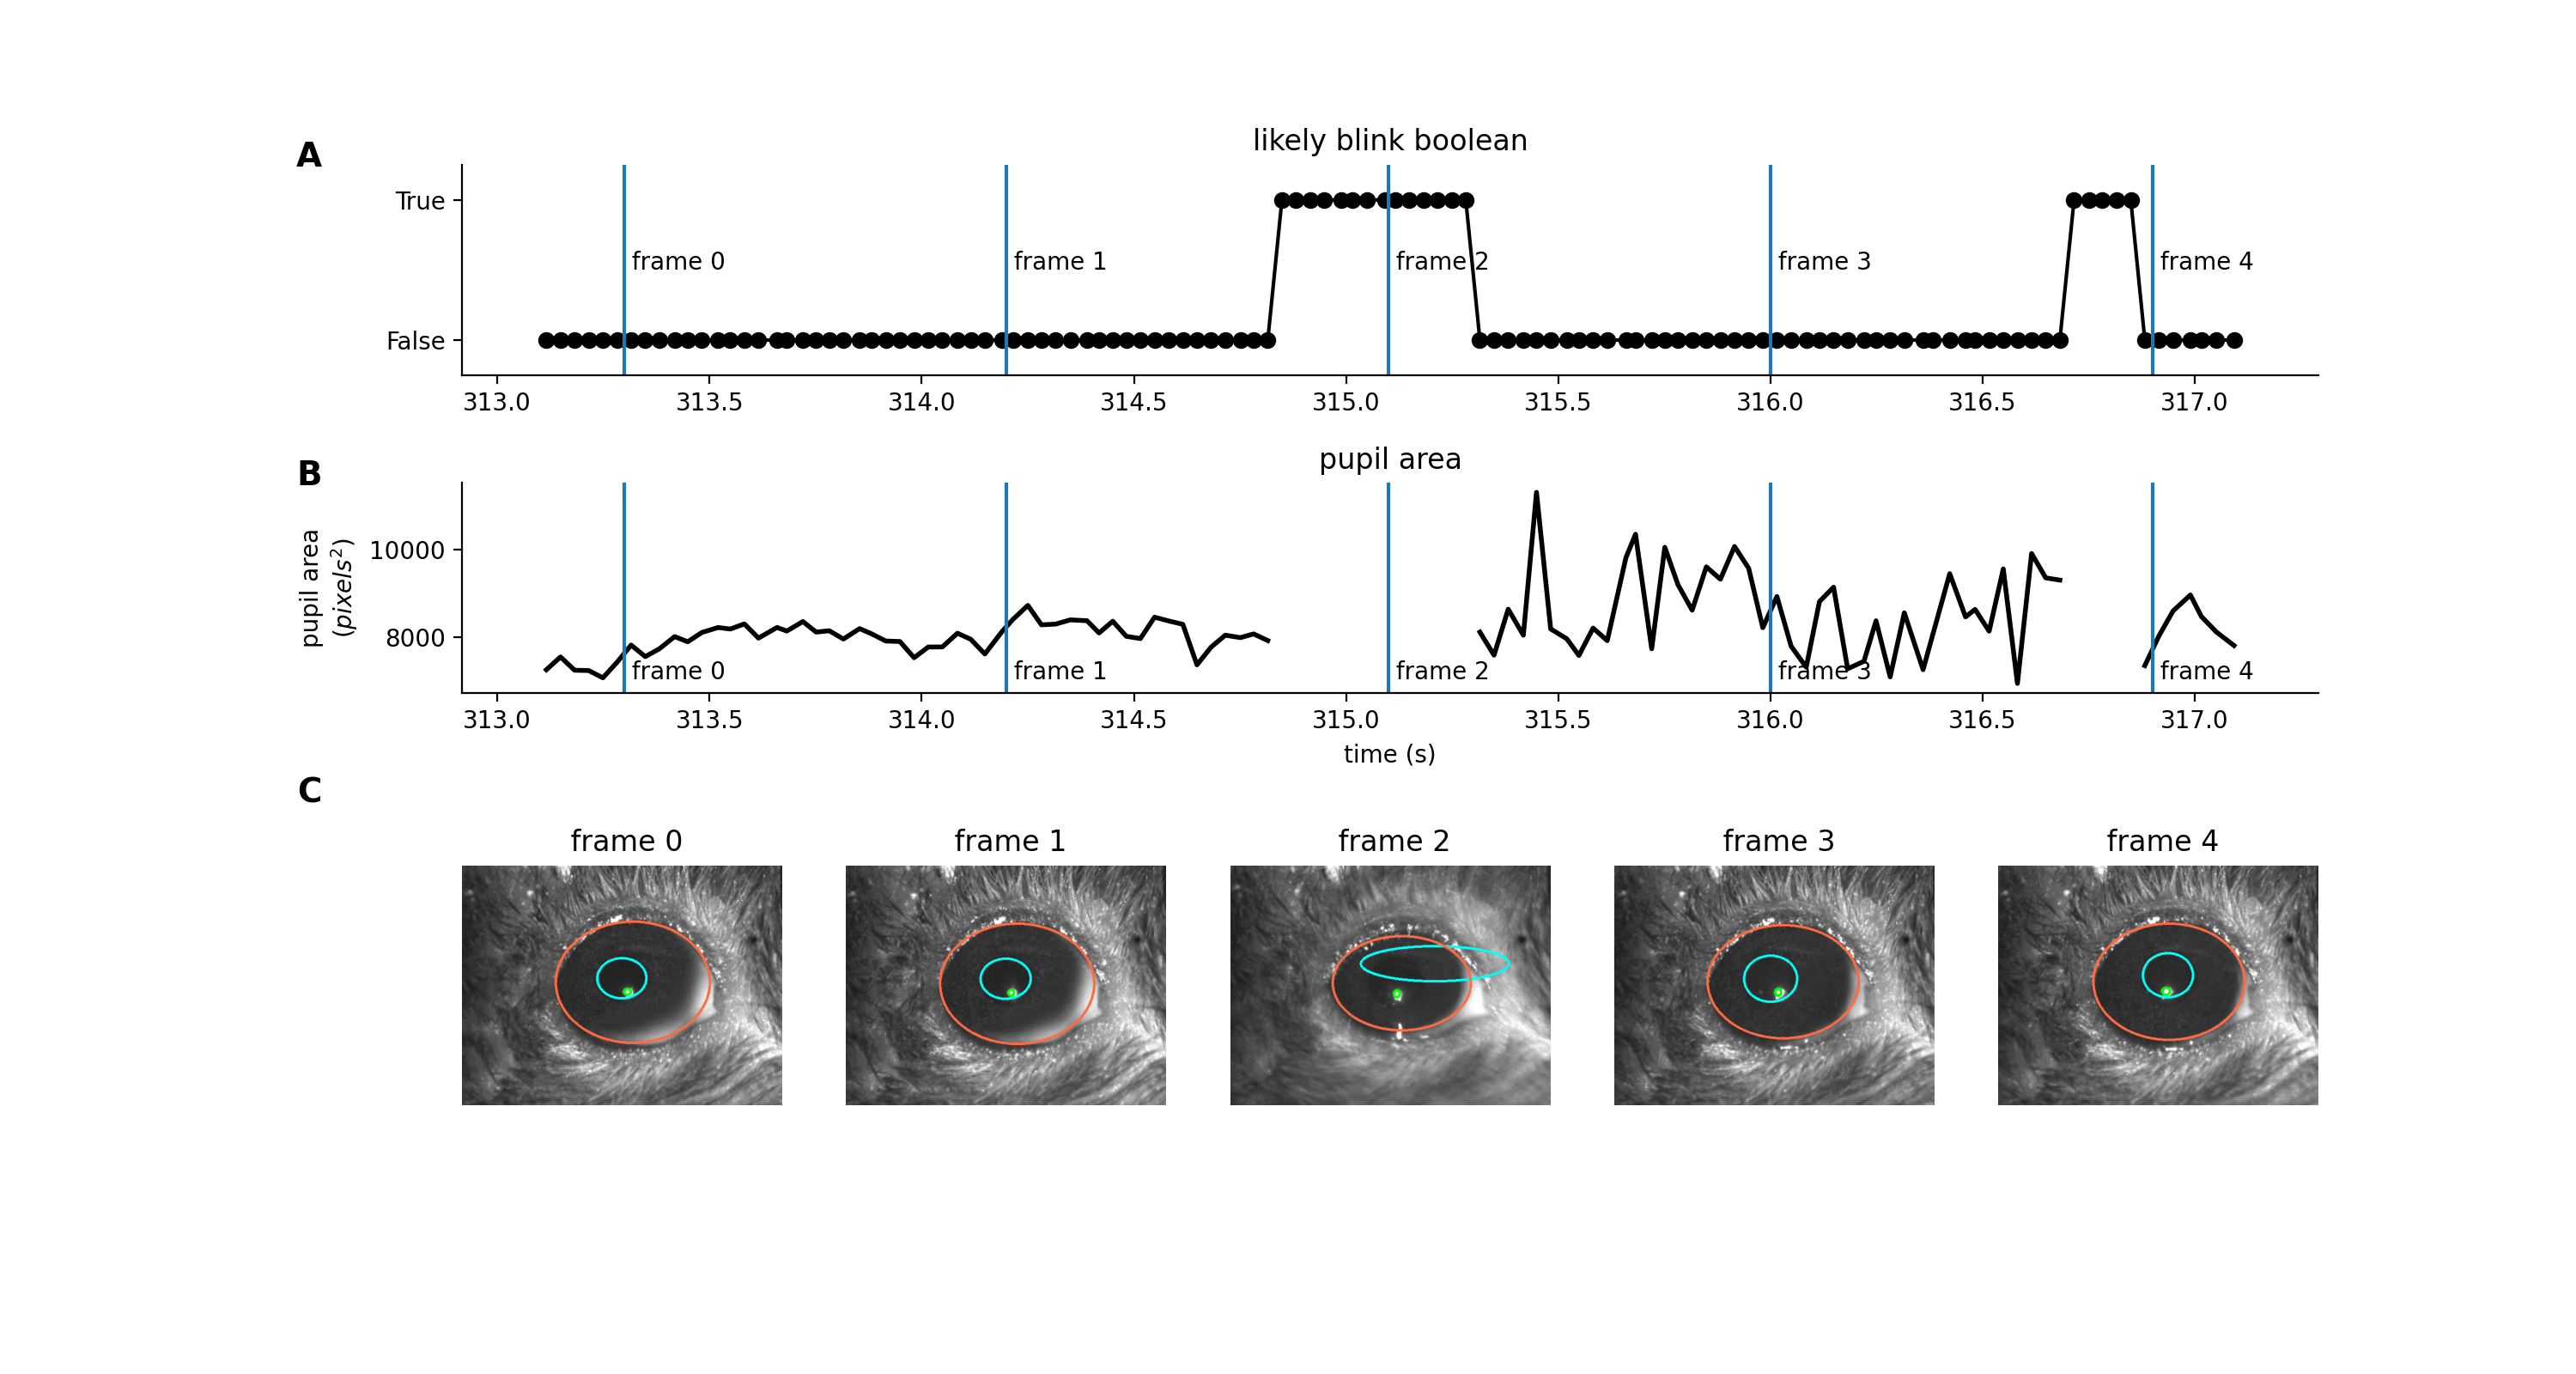

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/utilities.py:534: FutureWarning: `item` has been deprecated and will be removed in a future version
  if pd.notnull(ellipse_fit_row['center_x'].item()):
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/utilities.py:536: FutureWarning: `item` has been deprecated and will be removed in a future version
  int(ellipse_fit_row['center_x'].item()),
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/utilities.py:537: FutureWarning: `item` has been deprecated and will be removed in a future version
  int(ellipse_fit_row['center_y'].item())
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/utilities.py:541: FutureWarning: `item` has been deprecated and will be removed in a future version
  int(ellipse_fit_row['width'].item()),
/allen/programs/braintv/workgroups/nc-ophy

In [88]:
t0 = 315.1
t_span = 2

pupil_sample_times = [
    t0 - 1.8,
    t0 - 0.9,
    t0,
    t0 + 0.9,
    t0 + 1.8
]

fig = plt.figure(figsize=(15,8))
ax = {}
ax['likely_blinks'] = fg.place_axes_on_grid(fig, xspan = [0.075,1], yspan = [0, 0.2])
ax['pupil_area'] = fg.place_axes_on_grid(fig, xspan = [0.075,1], yspan = [0.3,0.5], sharex=ax['likely_blinks'])
ax['pupil_samples'] = fg.place_axes_on_grid(fig, dim = [1,len(pupil_sample_times)], xspan = [0.075,1], yspan = [0.55, 1])

labels = [
    {'label_text':'A', 'xpos':0,    'ypos':0.0, 'fontsize':14, 'weight': 'bold', 'ha': 'right', 'va': 'bottom'},
    {'label_text':'B', 'xpos':0,    'ypos':0.3, 'fontsize':14, 'weight': 'bold', 'ha': 'right', 'va': 'bottom'},
    {'label_text':'C', 'xpos':0,    'ypos':0.6, 'fontsize':14, 'weight': 'bold', 'ha': 'right', 'va': 'bottom'},
]


sdk_eye_data = session.eye_tracking.query('timestamps >= @t0-@t_span and timestamps <= @t0+@t_span')


ax['likely_blinks'].plot(
    sdk_eye_data['timestamps'],
    sdk_eye_data['likely_blink'],
    color='black',
    marker = 'o'
)


ax['likely_blinks'].set_title('likely blink boolean')


ax['pupil_area'].plot(
    sdk_eye_data['timestamps'],
    sdk_eye_data['pupil_area'],
    color='black',
    linewidth=2
)


ax['pupil_area'].set_title('pupil area')
ax['pupil_area'].set_xlabel('time (s)')

for ii,pupil_sample_time in enumerate(pupil_sample_times):
    text = ' frame {}'.format(ii)
    ax['likely_blinks'].axvline(pupil_sample_time)
    ax['likely_blinks'].text(pupil_sample_time, 0.5, text)
    
    ax['pupil_area'].axvline(pupil_sample_time)
    ax['pupil_area'].text(pupil_sample_time, sdk_eye_data['pupil_area'].min() + 100, text)
    
    ax['pupil_samples'][ii].imshow(eye_data.get_annotated_frame(time=pupil_sample_time, pupil=True, eye=True, corneal_reflection=True))
    ax['pupil_samples'][ii].set_title(text)
    ax['pupil_samples'][ii].axis('off')
    
ax['likely_blinks'].set_yticks([0,1])
ax['likely_blinks'].set_yticklabels(['False','True'])
ax['likely_blinks'].set_ylim([-0.25, 1.25])

ax['pupil_area'].set_ylabel('pupil area\n($pixels^2$)')

fg.add_labels(fig, labels)

sns.despine()

In [79]:
session.eye_tracking.query('likely_blink').head(200)

,timestamps,cr_area,eye_area,pupil_area,likely_blink,pupil_area_raw,cr_area_raw,eye_area_raw,cr_center_x,cr_center_y,cr_width,cr_height,cr_phi,eye_center_x,eye_center_y,eye_width,eye_height,eye_phi,pupil_center_x,pupil_center_y,pupil_width,pupil_height,pupil_phi
frame,,,,,,,,,,,,,,,,,,,,,,,
0,0.11421,NaN,NaN,NaN,True,19416.418996,216.992125,57708.597819,340.332906,252.315486,9.067484,7.617410,-0.552291,345.003765,236.366356,148.646817,123.576257,-0.117911,359.451964,230.193961,72.244751,78.615763,-0.607889
1,0.12746,NaN,NaN,NaN,True,21332.372860,177.354188,57652.605768,340.038467,252.528357,7.885802,7.158890,-0.497289,345.696679,236.858141,148.966650,123.191294,-0.111767,360.086625,227.665799,74.155351,82.403308,-0.211089
2,0.14538,NaN,NaN,NaN,True,NaN,195.257092,56838.312404,337.513075,253.450336,8.751598,7.101819,-0.445420,344.786935,237.801166,146.527092,123.473390,-0.159513,NaN,NaN,NaN,NaN,NaN
3,0.17971,NaN,NaN,NaN,True,NaN,132.084741,56704.714226,335.414457,254.821737,7.788107,5.398472,-0.153407,342.673351,238.806385,147.285991,122.548458,-0.142143,NaN,NaN,NaN,NaN,NaN
4,0.21944,NaN,NaN,NaN,True,NaN,110.564780,57422.194529,335.518706,254.460654,6.692331,5.258835,-0.206350,342.269113,236.962609,148.019201,123.484332,-0.139551,NaN,NaN,NaN,NaN,NaN
5,0.24730,NaN,NaN,NaN,True,13032.000360,152.961311,57533.991415,335.405989,254.989988,7.457488,6.528887,-0.349439,342.352849,238.065168,148.711611,123.148678,-0.116420,367.405145,239.680325,46.734365,64.406634,0.391974
6,0.28061,NaN,NaN,NaN,True,NaN,150.601730,57679.719578,335.186646,253.924537,7.588955,6.316814,-0.459478,341.265206,237.320920,149.008194,123.214868,-0.137274,NaN,NaN,NaN,NaN,NaN
7,0.31902,NaN,NaN,NaN,True,5767.399654,169.487206,57791.800071,334.993758,254.665828,7.935306,6.798661,-0.449101,340.899455,238.150842,148.165147,124.156737,-0.130815,391.608968,213.505359,24.810591,42.846474,-0.623914
8,0.35821,NaN,NaN,NaN,True,18861.355646,148.046918,57359.062844,334.753102,256.550501,7.803617,6.038840,-0.207790,341.248968,239.060395,148.003692,123.361496,-0.123289,348.469240,245.598276,60.823379,77.483908,0.740217


<IPython.core.display.Javascript object>


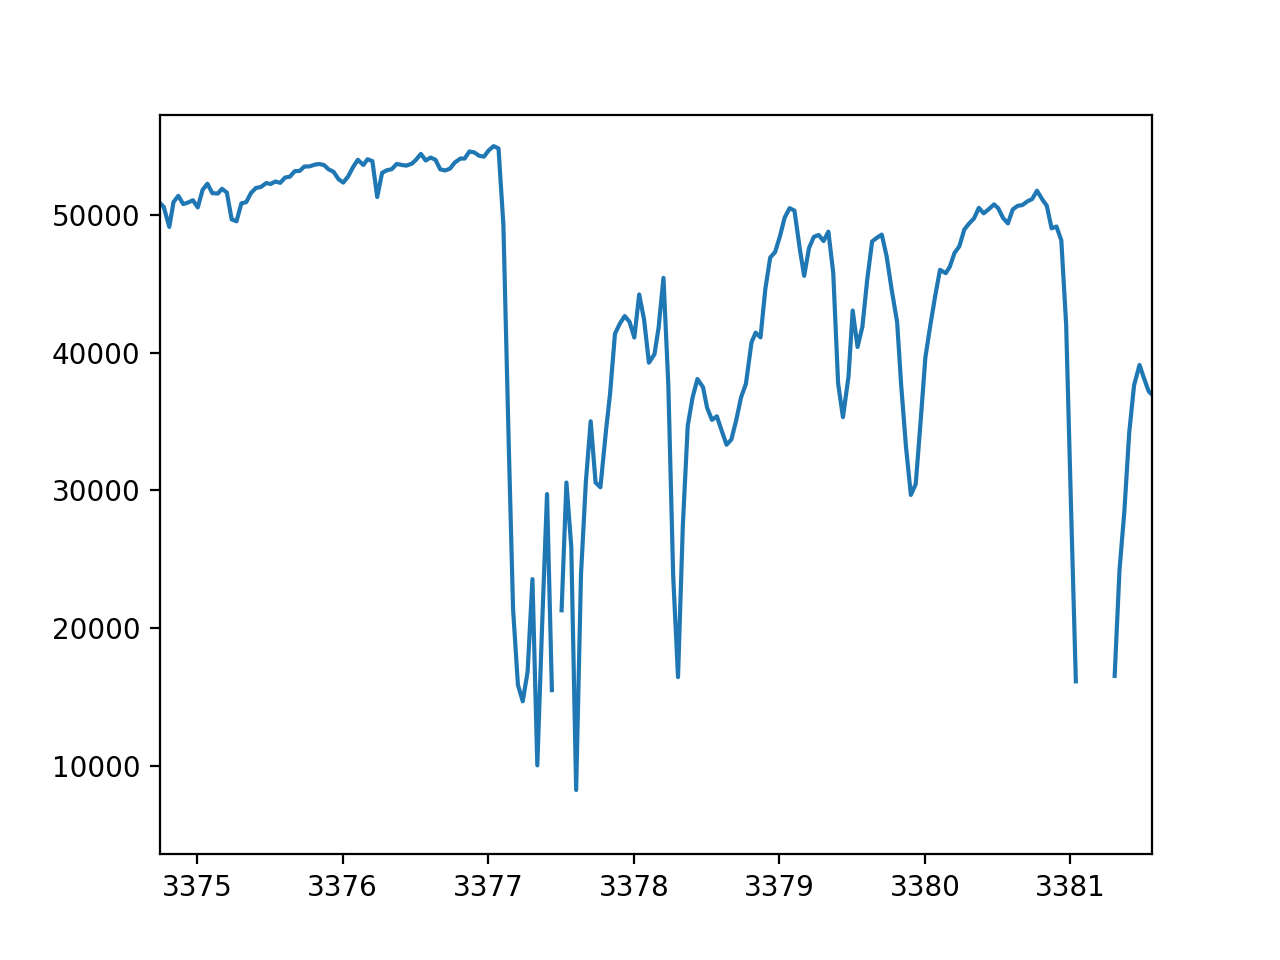

In [76]:
np.sort(session.eye_tracking.columns)

array(['cr_area', 'cr_area_raw', 'cr_center_x', 'cr_center_y',
       'cr_height', 'cr_phi', 'cr_width', 'eye_area', 'eye_area_raw',
       'eye_center_x', 'eye_center_y', 'eye_height', 'eye_phi',
       'eye_width', 'likely_blink', 'pupil_area', 'pupil_area_raw',
       'pupil_center_x', 'pupil_center_y', 'pupil_height', 'pupil_phi',
       'pupil_width', 'timestamps'], dtype=object)

<IPython.core.display.Javascript object>


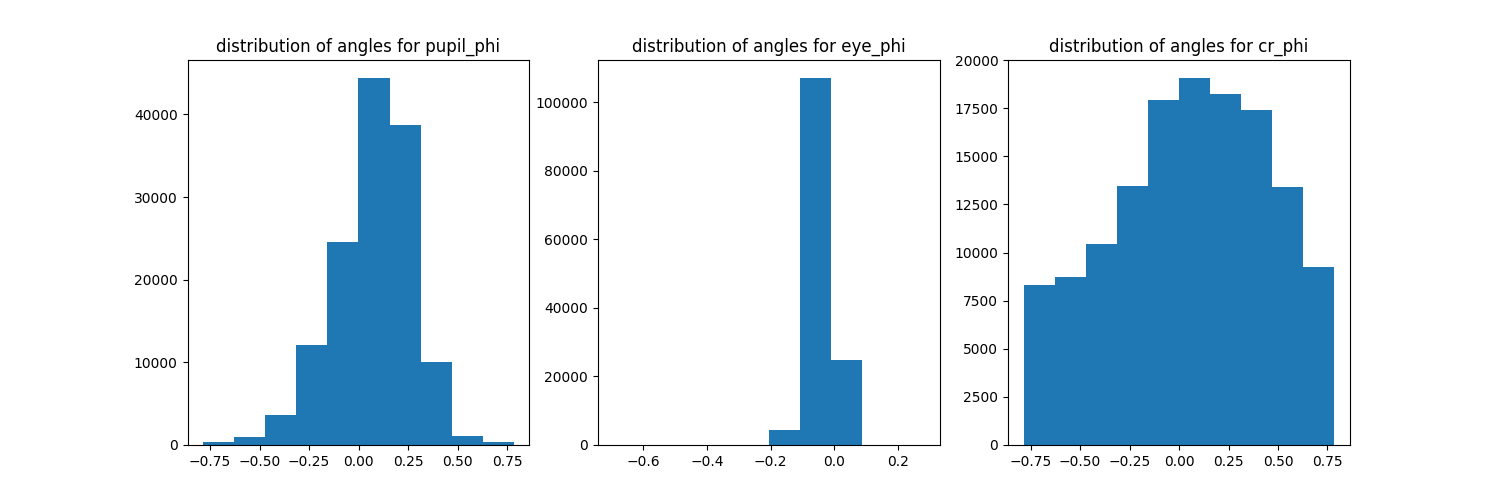

In [97]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
for i,v in enumerate(['pupil','eye','cr']):
    ax[i].hist(session.eye_tracking['{}_phi'.format(v)].dropna())
    ax[i].set_title('distribution of angles for {}_phi'.format(v))

In [98]:
session.eye_tracking['cr_phi'].describe()

count    136263.000000
mean          0.052476
std           0.396906
min          -0.785386
25%          -0.233028
50%           0.075490
75%           0.369060
max           0.785365
Name: cr_phi, dtype: float64

In [105]:
2*np.pi/8

0.7853981633974483

In [110]:
(session.eye_tracking['cr_width'] < session.eye_tracking['cr_height']).mean()

0.2866210722514933